# Calculate the Flows on each segment

In [40]:
# load libraries

import pandas as pd
import geopandas as gpd
import networkx as nx
import osmnx as ox
import pickle
import os
import matplotlib.pyplot as plt

from spatial_interaction_tools import *

## Load the data

In [2]:
# load the od matrix data

with open('data/tokyo/od_matrix_scenarios_poi.pkl', 'rb') as f:
    od_matrix_poi_density = pickle.load(f)

with open('data/tokyo/od_matrix_scenarios_real.pkl', 'rb') as f:
    od_matrix_scenarios = pickle.load(f)

In [3]:
# load network
tokyo_drive_network = ox.load_graphml(os.path.join('data', 'tokyo', 'drive_network_updated.graphml'))

In [7]:
# load the street network
tokyo_multimodal_network = nx.read_graphml(os.path.join('data', 'tokyo', 'multimodal_network_updated_weight.graphml'))

## Assign flow to the network

In [24]:
[n[2] for n in tokyo_multimodal_network.edges(data = True) if ('layer' in n[2]) and (n[2]['layer'] == 'bus')][:10]

[{'route_id': '2',
  'route_short_name': '波０１（ＮＭ０１）',
  'traversals': '41',
  'distance': '326.0',
  'geometry': 'LINESTRING (-5308.519344572067 -42032.4832290355, -5312.656182220608 -42035.22628308208, -5316.793022415037 -42037.96933520117, -5320.929865159969 -42040.71238539064, -5325.066710455398 -42043.455433650495, -5329.203558294412 -42046.19847998358, -5333.340408683921 -42048.941524386326, -5337.47726162162 -42051.68456686159, -5341.6141171051995 -42054.42760740724, -5345.750975141578 -42057.1706460254, -5349.887835723836 -42059.91368271182, -5354.024698851971 -42062.65671747146, -5358.161564530597 -42065.39975030361, -5362.298432759706 -42068.14278120543, -5366.435303532387 -42070.88581017906, -5370.5721768555495 -42073.62883722307, -5374.709052724584 -42076.371862338885, -5378.845931144096 -42079.1148855265, -5382.98281211409 -42081.85790678521, -5387.1196956276435 -42084.60092611359, -5391.256581691675 -42087.34394351449, -5388.567137574905 -42091.46485583296, -5385.877690967

In [26]:
od_matrix_scenarios['orig']

,source,target,vehicle,public_transport,obs_total_flow,driving_time_orig,multilayer_time,driving_path_orig,multilayer_path,Oi,Dj,Ai,Bj,pred_vehicle,pred_public_transport,pred_total,driving_path_orig_edit
0,10,10,1304.0,27557.0,28861.0,0.000000,0.000000,[zone_10],[zone_10],248305.0,248305.0,0.000392,0.000661,16003.249875,16003.249875,32006.499750,[]
1,11,10,1240.0,3309.0,4549.0,3.811667,25.415646,"[zone_11, 344377171, 344377162, 343691431, 965...","[zone_11, street_4547666658, street_9938380955...",250375.0,248305.0,0.000424,0.000661,6983.426389,4011.725143,10995.151532,"[344377171, 344377162, 343691431, 9652985240, ..."
2,12,10,1422.0,7033.0,8455.0,2.746667,26.751777,"[zone_12, 1070481777, 271662653, 1033242732, 1...","[zone_12, street_1070481853, street_1070481791...",299902.0,248305.0,0.000370,0.000661,9430.208914,3882.566125,13312.775038,"[1070481777, 271662653, 1033242732, 1033242736..."
3,13,10,1081.0,7010.0,8091.0,1.831667,20.897115,"[zone_13, 266238456, 266238454, 254365136, 206...","[zone_13, street_3949941304, street_5824618699...",158098.0,248305.0,0.000366,0.000661,6128.119389,2841.349626,8969.469015,"[266238456, 266238454, 254365136, 206070133, 4..."
4,20,10,692.0,5179.0,5871.0,3.618333,35.306717,"[zone_20, 1892744313, 345118821, 271660879, 27...","[zone_20, street_9938588103, street_9938588104...",176254.0,248305.0,0.000444,0.000661,5389.597362,1668.047318,7057.644680,"[1892744313, 345118821, 271660879, 271660876, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13220,630,634,447.0,442.0,889.0,9.206667,39.692339,"[zone_630, 1152743127, 597699652, 597699653, 5...","[zone_630, street_1152742757, street_115274296...",56953.0,211182.0,0.000802,0.001412,1492.219055,1371.898282,2864.117337,"[1152743127, 597699652, 597699653, 597699655, ..."
13221,631,634,4572.0,1996.0,6568.0,8.193333,32.175078,"[zone_631, 739107740, 765040547, 740187651, 27...","[zone_631, street_10945241289, street_60073473...",141795.0,211182.0,0.000832,0.001412,4916.036844,5472.763280,10388.800124,"[739107740, 765040547, 740187651, 272334827, 7..."
13222,632,634,320.0,371.0,691.0,13.311667,48.816243,"[zone_632, 726541941, 726541898, 699472776, 73...","[zone_632, street_2623542496, street_746004389...",110736.0,211182.0,0.001221,0.001412,1647.964733,2396.145399,4044.110132,"[726541941, 726541898, 699472776, 733998865, 7..."
13223,633,634,3722.0,2691.0,6413.0,10.255000,46.885575,"[zone_633, 738151280, 736977336, 2741669242, 7...","[zone_633, street_1649911490, street_471787114...",149670.0,211182.0,0.000845,0.001412,3210.077193,2504.336764,5714.413957,"[738151280, 736977336, 2741669242, 736977210, ..."


In [27]:
%%time

# add flow of scenarios to the networks
for key, df in od_matrix_scenarios.items():
    print(f'Processing {key}')
    # get path without the beginning and the finish
    df[f'driving_path_{key}_edit'] = df[f'driving_path_{key}'].apply(lambda x: [n for n in x if isinstance(n, int)])
    df[f'multilayer_path_edit'] = df[f'multilayer_path'].apply(lambda x: [n for n in x if 'zone' not in n])

    # calculate flow for driving
    tokyo_drive_network = calculate_flow(tokyo_drive_network, df, flow = 'pred_vehicle', path = f'driving_path_{key}_edit', attr_name = f'flows_{key}')
    tokyo_multimodal_network = calculate_flow(tokyo_multimodal_network, df, flow = 'pred_public_transport', path = f'multilayer_path_edit', attr_name = f'flows_{key}')
    

Processing orig
Processing removed_Ginza
Processing removed_Akihabara
Processing removed_Shinjuku
Processing removed_Chuo_dori
Processing removed_all
Processing removed_Ginza_nodes
Processing removed_Akihabara_nodes
Processing removed_Shinjuku_nodes
Processing removed_Chuo_dori_nodes
Processing removed_all_nodes
CPU times: total: 3min 1s
Wall time: 9min 14s


In [56]:
od_matrix_poi_density['0']

,source,target,vehicle,public_transport,obs_total_flow,driving_time_0,multilayer_time,driving_path_0,multilayer_path,Oi,Dj,Ai,Bj,pred_vehicle,pred_public_transport,pred_total,driving_path_0_edit,multilayer_path_edit
0,10,10,1304.0,27557.0,28861.0,0.000000,0.000000,[zone_10],[zone_10],248305.0,248305.0,0.000434,0.000906,24242.054095,24242.054095,48484.108190,[],[]
1,11,10,1240.0,3309.0,4549.0,1.528333,25.415646,"[zone_11, 251731289, 1584417297, 256672384, 55...","[zone_11, street_4547666658, street_9938380955...",250375.0,248305.0,0.000446,0.000906,17388.583240,5771.937270,23160.520510,[],"[street_4547666658, street_9938380955, street_..."
2,12,10,1422.0,7033.0,8455.0,13.796667,26.751777,"[zone_12, 260710829, 567877350, 6538495149, 43...","[zone_12, street_1070481853, street_1070481791...",299902.0,248305.0,0.000296,0.000906,727.254578,4256.553677,4983.808255,[],"[street_1070481853, street_1070481791, street_..."
3,13,10,1081.0,7010.0,8091.0,3.900000,20.897115,"[zone_13, 266242042, 266238544, 6282086586, 57...","[zone_13, street_3949941304, street_5824618699...",158098.0,248305.0,0.000331,0.000906,4610.870849,3513.630450,8124.501299,[],"[street_3949941304, street_5824618699, street_..."
4,20,10,692.0,5179.0,5871.0,25.531667,35.306717,"[zone_20, 256426177, 567878876, 568090177, 565...","[zone_20, street_9938588103, street_9938588104...",176254.0,248305.0,0.000611,0.000906,52.518542,3140.792194,3193.310736,[],"[street_9938588103, street_9938588104, street_..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13220,630,634,447.0,442.0,889.0,0.200000,39.692339,"[zone_630, 1592997381, zone_634]","[zone_630, street_1152742757, street_115274296...",56953.0,211182.0,0.000682,0.000849,6640.711972,701.612715,7342.324687,[],"[street_1152742757, street_1152742969, street_..."
13221,631,634,4572.0,1996.0,6568.0,0.231667,32.175078,"[zone_631, 1592997376, 1592997381, zone_634]","[zone_631, street_10945241289, street_60073473...",141795.0,211182.0,0.000677,0.000849,16277.177324,2676.591586,18953.768911,[],"[street_10945241289, street_600734736, street_..."
13222,632,634,320.0,371.0,691.0,0.231667,48.816243,"[zone_632, 1592997376, 1592997381, zone_634]","[zone_632, street_2623542496, street_746004389...",110736.0,211182.0,0.000809,0.000849,15191.925052,954.173521,16146.098572,[],"[street_2623542496, street_746004389, street_2..."
13223,633,634,3722.0,2691.0,6413.0,0.231667,46.885575,"[zone_633, 1592997376, 1592997381, zone_634]","[zone_633, street_1649911490, street_471787114...",149670.0,211182.0,0.000684,0.000849,17362.452120,1219.325391,18581.777511,[],"[street_1649911490, street_4717871143, street_..."


In [44]:
%%time

# add flow of scenarios to the networks
for key, df in od_matrix_poi_density.items():
    print(f'Processing {key}')
    # get path without the beginning and the finish
    df[f'driving_path_{key}_edit'] = df[f'driving_path_{key}'].apply(lambda x: [n for n in x if isinstance(n, int)])
    df[f'multilayer_path_edit'] = df[f'multilayer_path'].apply(lambda x: [n for n in x if 'zone' not in n])

    # calculate flow for driving
    tokyo_drive_network = calculate_flow(tokyo_drive_network, df, flow = 'pred_vehicle', path = f'driving_path_{key}_edit', attr_name = f'flows_{key}')
    tokyo_multimodal_network = calculate_flow(tokyo_multimodal_network, df, flow = 'pred_public_transport', path = f'multilayer_path_edit', attr_name = f'flows_{key}')
    

Processing 0
Processing 10
Processing 20
Processing 30
Processing 40
Processing 50
Processing 60
Processing 70
Processing 80
Processing 90
Processing 100
Processing 110
Processing 120
Processing 130
Processing 140
Processing 150
Processing 160
Processing 170
Processing 180
Processing 190
Processing 200
Processing 210
Processing 220
Processing 230
Processing 240
Processing 250
Processing 260
Processing 270
Processing 280
Processing 290
Processing 300
CPU times: total: 15min 4s
Wall time: 1h 12min 21s


In [65]:
%%time

# add flow of scenarios to the networks
for key, df in od_matrix_poi_density.items():
    print(f'Processing {key}')
    # get path without the beginning and the finish
    df[f'driving_path_{key}_edit'] = df[f'driving_path_{key}'].apply(lambda x: [int(n) for n in x if not (isinstance(n, str) and ('zone' in n))])

    # # calculate flow for driving
    tokyo_drive_network = calculate_flow(tokyo_drive_network, df, flow = 'pred_vehicle', path = f'driving_path_{key}_edit', attr_name = f'flows_{key}')

Processing 0
Processing 10
Processing 20
Processing 30
Processing 40
Processing 50
Processing 60
Processing 70
Processing 80
Processing 90
Processing 100
Processing 110
Processing 120
Processing 130
Processing 140
Processing 150
Processing 160
Processing 170
Processing 180
Processing 190
Processing 200
Processing 210
Processing 220
Processing 230
Processing 240
Processing 250
Processing 260
Processing 270
Processing 280
Processing 290
Processing 300
CPU times: total: 39.9 s
Wall time: 1min 26s


In [66]:
od_matrix_poi_density['0']

,source,target,vehicle,public_transport,obs_total_flow,driving_time_0,multilayer_time,driving_path_0,multilayer_path,Oi,Dj,Ai,Bj,pred_vehicle,pred_public_transport,pred_total,driving_path_0_edit,multilayer_path_edit
0,10,10,1304.0,27557.0,28861.0,0.000000,0.000000,[zone_10],[zone_10],248305.0,248305.0,0.000434,0.000906,24242.054095,24242.054095,48484.108190,[],[]
1,11,10,1240.0,3309.0,4549.0,1.528333,25.415646,"[zone_11, 251731289, 1584417297, 256672384, 55...","[zone_11, street_4547666658, street_9938380955...",250375.0,248305.0,0.000446,0.000906,17388.583240,5771.937270,23160.520510,"[251731289, 1584417297, 256672384, 558082299]","[street_4547666658, street_9938380955, street_..."
2,12,10,1422.0,7033.0,8455.0,13.796667,26.751777,"[zone_12, 260710829, 567877350, 6538495149, 43...","[zone_12, street_1070481853, street_1070481791...",299902.0,248305.0,0.000296,0.000906,727.254578,4256.553677,4983.808255,"[260710829, 567877350, 6538495149, 4356746285,...","[street_1070481853, street_1070481791, street_..."
3,13,10,1081.0,7010.0,8091.0,3.900000,20.897115,"[zone_13, 266242042, 266238544, 6282086586, 57...","[zone_13, street_3949941304, street_5824618699...",158098.0,248305.0,0.000331,0.000906,4610.870849,3513.630450,8124.501299,"[266242042, 266238544, 6282086586, 573233928, ...","[street_3949941304, street_5824618699, street_..."
4,20,10,692.0,5179.0,5871.0,25.531667,35.306717,"[zone_20, 256426177, 567878876, 568090177, 565...","[zone_20, street_9938588103, street_9938588104...",176254.0,248305.0,0.000611,0.000906,52.518542,3140.792194,3193.310736,"[256426177, 567878876, 568090177, 565479947, 5...","[street_9938588103, street_9938588104, street_..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13220,630,634,447.0,442.0,889.0,0.200000,39.692339,"[zone_630, 1592997381, zone_634]","[zone_630, street_1152742757, street_115274296...",56953.0,211182.0,0.000682,0.000849,6640.711972,701.612715,7342.324687,[1592997381],"[street_1152742757, street_1152742969, street_..."
13221,631,634,4572.0,1996.0,6568.0,0.231667,32.175078,"[zone_631, 1592997376, 1592997381, zone_634]","[zone_631, street_10945241289, street_60073473...",141795.0,211182.0,0.000677,0.000849,16277.177324,2676.591586,18953.768911,"[1592997376, 1592997381]","[street_10945241289, street_600734736, street_..."
13222,632,634,320.0,371.0,691.0,0.231667,48.816243,"[zone_632, 1592997376, 1592997381, zone_634]","[zone_632, street_2623542496, street_746004389...",110736.0,211182.0,0.000809,0.000849,15191.925052,954.173521,16146.098572,"[1592997376, 1592997381]","[street_2623542496, street_746004389, street_2..."
13223,633,634,3722.0,2691.0,6413.0,0.231667,46.885575,"[zone_633, 1592997376, 1592997381, zone_634]","[zone_633, street_1649911490, street_471787114...",149670.0,211182.0,0.000684,0.000849,17362.452120,1219.325391,18581.777511,"[1592997376, 1592997381]","[street_1649911490, street_4717871143, street_..."


In [67]:
[n for n in tokyo_drive_network.edges(data = True) if (n[2]['flows_300'] > 0)]

[(31253617,
  31253753,
  {'osmid': 265010573,
   'oneway': True,
   'ref': '316',
   'name': '海岸通り',
   'highway': 'primary',
   'reversed': False,
   'length': 237.069,
   'speed_kph': 44.2,
   'geometry': <LINESTRING (-7083.814 -39608.021, -7038.104 -39500.023, -6994.83 -39388.738)>,
   'travel_time': 19.3,
   'travel_time_mins': '0.32166666666666666',
   'flows_orig': 35.82332591906709,
   'flows_removed_Ginza': 0,
   'flows_removed_Akihabara': 35.82332591906709,
   'flows_removed_Shinjuku': 35.82332591906709,
   'flows_removed_Chuo_dori': 0,
   'flows_removed_all': 0,
   'flows_removed_Ginza_nodes': 33.86158472685226,
   'flows_removed_Akihabara_nodes': 35.8523627373709,
   'flows_removed_Shinjuku_nodes': 35.831841696032726,
   'flows_removed_Chuo_dori_nodes': 14.894876512171313,
   'flows_removed_all_nodes': 33.89562251920052,
   'flows_0': 0,
   'flows_10': 0,
   'flows_20': 0,
   'flows_30': 17.722834307189206,
   'flows_40': 24.36318350542631,
   'flows_50': 23.743354186991514

In [68]:
# Define the file path where you want to save the pickle file
pickle_file_path = os.path.join('data', 'tokyo', 'drive_network_with_flow.pkl')

# Save the network object to a pickle file
with open(pickle_file_path, 'wb') as f:
    pickle.dump(tokyo_drive_network, f)

In [48]:
# Define the file path where you want to save the pickle file
pickle_file_path = os.path.join('data', 'tokyo', 'multimodal_network_with_flow.pkl')

# Save the network object to a pickle file
with open(pickle_file_path, 'wb') as f:
    pickle.dump(tokyo_multimodal_network, f)

## Calculate Emissions

In [10]:
# define emissions for each mode
emissions_km = {
    'driving': 128,
    'bus': 71,
    'rail': 20
}

In [69]:
# initialise dictionary
emissions_dict = {
    'scenario': [],
    'driving': [],
    'bus': [],
    'rail': [],
    'total': []
}

# calculate for each scenario
for s in list(od_matrix_scenarios.keys()) + list(od_matrix_poi_density.keys()):
    print(f'Analysing {s}')
    # initialise value
    emissions_drive = 0
    emissions_bus = 0
    emissions_rail = 0
    
    # calculate total length travelled by car
    for u,v,k,d in tokyo_drive_network.edges(data = True, keys = True):
        if d[f'flows_{s}'] > 0:
            emissions_drive += d[f'flows_{s}'] * d['length']

    # calculate emissions by public transport
    for u,v,k,d in tokyo_multimodal_network.edges(data = True, keys = True):
        # skip unnecessary edges
        if ('layer' not in d) or (d[f'flows_{s}'] == 0):
            continue
        # calculate for each mode
        if d['layer'] == 'bus':
            emissions_bus += d[f'flows_{s}'] * d['weight_distance']
        if d['layer'] == 'rail':
            emissions_rail += d[f'flows_{s}'] * d['weight_distance']

    # multiply by the emissions per passenger km
    emissions_drive *= emissions_km['driving']
    emissions_bus *= emissions_km['bus']
    emissions_rail *= emissions_km['rail']

    # add to dict
    emissions_dict['scenario'].append(s)
    emissions_dict['driving'].append(emissions_drive)
    emissions_dict['bus'].append(emissions_bus)
    emissions_dict['rail'].append(emissions_rail)
    emissions_dict['total'].append(emissions_drive + emissions_bus + emissions_rail)

emissions_df = pd.DataFrame(emissions_dict)

Analysing orig
Analysing removed_Ginza
Analysing removed_Akihabara
Analysing removed_Shinjuku
Analysing removed_Chuo_dori
Analysing removed_all
Analysing removed_Ginza_nodes
Analysing removed_Akihabara_nodes
Analysing removed_Shinjuku_nodes
Analysing removed_Chuo_dori_nodes
Analysing removed_all_nodes
Analysing 0
Analysing 10
Analysing 20
Analysing 30
Analysing 40
Analysing 50
Analysing 60
Analysing 70
Analysing 80
Analysing 90
Analysing 100
Analysing 110
Analysing 120
Analysing 130
Analysing 140
Analysing 150
Analysing 160
Analysing 170
Analysing 180
Analysing 190
Analysing 200
Analysing 210
Analysing 220
Analysing 230
Analysing 240
Analysing 250
Analysing 260
Analysing 270
Analysing 280
Analysing 290
Analysing 300


In [71]:
emissions_df.to_csv('data/tokyo/emissions_scenarios_real.csv', index = False)

In [70]:
emissions_df

,scenario,driving,bus,rail,total
0,orig,1.907170e+11,3.073025e+10,2.528653e+09,2.239759e+11
1,removed_Ginza,1.908560e+11,3.073927e+10,2.529359e+09,2.241246e+11
2,removed_Akihabara,1.907170e+11,3.073025e+10,2.528653e+09,2.239759e+11
3,removed_Shinjuku,1.907170e+11,3.073025e+10,2.528653e+09,2.239759e+11
4,removed_Chuo_dori,1.913011e+11,3.075369e+10,2.530414e+09,2.245852e+11
5,removed_all,1.908560e+11,3.073927e+10,2.529359e+09,2.241246e+11
6,removed_Ginza_nodes,1.906293e+11,3.073367e+10,2.528803e+09,2.238917e+11
7,removed_Akihabara_nodes,1.909103e+11,3.073395e+10,2.528831e+09,2.241730e+11
8,removed_Shinjuku_nodes,1.892658e+11,3.074160e+10,2.529127e+09,2.225365e+11
9,removed_Chuo_dori_nodes,1.901446e+11,3.104587e+10,2.542435e+09,2.237329e+11


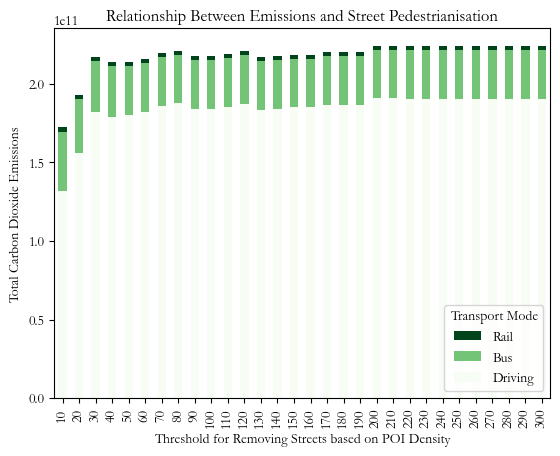

In [101]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Garamond', 'DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']

emissions_df.iloc[-30:].plot.bar(
    x = 'scenario',
    y = ['driving', 'bus', 'rail'],
    stacked = True,
    cmap = 'Greens'
)

plt.legend(loc = 'lower right', reverse = True, labels = ['Driving', 'Bus', 'Rail'], title = 'Transport Mode')

plt.xlabel('Threshold for Removing Streets based on POI Density')
plt.ylabel('Total Carbon Dioxide Emissions')

plt.title('Relationship Between Emissions and Street Pedestrianisation')

plt.savefig('documents/img/co2_emissions_poi.png', bbox_inches = 'tight')